In [2]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import simpleaudio as sa

<IPython.core.display.Javascript object>


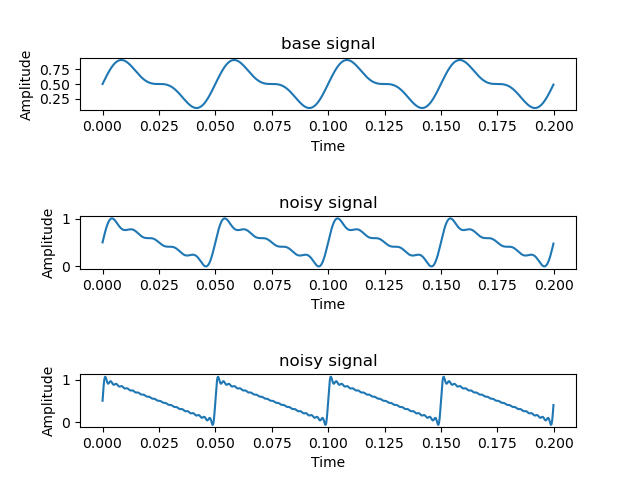

<IPython.core.display.Javascript object>


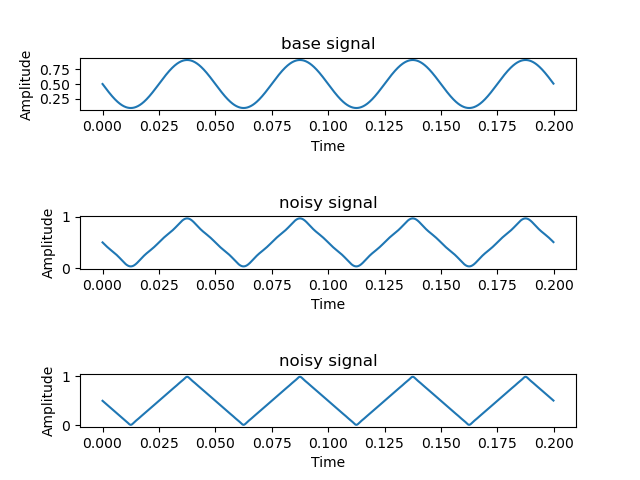

In [68]:
# Assignment 1
# Part 1
# Accepts time in seconds
def fourier(coeff, samp_freq, fun_freq, time):
    mags = np.abs(coeff)
    phase = np.angle(coeff)
    time_vector = np.arange(0 , time, 1 / samp_freq)
    signal = np.zeros(len(time_vector))
    for i in range(1, len(coeff)):
        signal += 2 * mags[i] * np.cos(i * fun_freq * 2 * np.pi * time_vector + phase[i]) 
    signal += coeff[0]
    return signal, time_vector

# Part 2
# Code to utilize duration, sample frequency, and fundamental frequency is already included in part 1. See above.

# Part 3
# Make the array of coefficients
def make_coeff(n, a_knot):
    array = [0] * (n + 1)
    array[0] = a_knot
    for i in range(1, n + 1):
        array[i] = 1 / (complex(0, 1) * 2 * i * np.pi)
    return array
coeff_arr1_a1_p3 = make_coeff(2, 0.5)
coeff_arr2_a1_p3 = make_coeff(5, 0.5)
coeff_arr3_a1_p3 = make_coeff(20, 0.5)
signal1_a1_p3, time1_a1_p3 = fourier(coeff_arr1_a1_p3, 8000, 20, 0.2)
signal2_a1_p3, time2_a1_p3 = fourier(coeff_arr2_a1_p3, 8000, 20, 0.2)
signal3_a1_p3, time3_a1_p3 = fourier(coeff_arr3_a1_p3, 8000, 20, 0.2)
plt.figure()
plt.subplots_adjust(hspace = 2)
plt.subplot(3, 1, 1)
plt.title('base signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time1_a1_p3, signal1_a1_p3)
plt.subplot(3, 1, 2)
plt.title('noisy signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time2_a1_p3, signal2_a1_p3)
plt.subplot(3, 1, 3)
plt.title('noisy signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time3_a1_p3, signal3_a1_p3)

# Part 4
def make_coeff_p4(n, a_knot):
    array = [0] * (n + 1)
    array[0] = a_knot
    for i in range(1, n + 1):
        array[i] = (2 * np.sin((i * np.pi) / 2) / (complex(0, 1) * (i * np.pi) ** 2)) * np.exp(-1 * complex(0, 1) * 2 * i * (np.pi / 2))
    return array
coeff_arr1_a1_p4 = make_coeff_p4(2, 0.5)
coeff_arr2_a1_p4 = make_coeff_p4(5, 0.5)
coeff_arr3_a1_p4 = make_coeff_p4(20, 0.5)
signal1_a1_p4, time1_a1_p4 = fourier(coeff_arr1_a1_p4, 8000, 20, 0.2)
signal2_a1_p4, time2_a1_p4 = fourier(coeff_arr2_a1_p4, 8000, 20, 0.2)
signal3_a1_p4, time3_a1_p4 = fourier(coeff_arr3_a1_p4, 8000, 20, 0.2)
plt.figure()
plt.subplots_adjust(hspace = 2)
plt.subplot(3, 1, 1)
plt.title('base signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time1_a1_p4, signal1_a1_p4)
plt.subplot(3, 1, 2)
plt.title('noisy signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time2_a1_p4, signal2_a1_p4)
plt.subplot(3, 1, 3)
plt.title('noisy signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time3_a1_p4, signal3_a1_p4)

# Assignment 1 Discussion
Because the denominator of the a_k formula for the second signal increases faster due to it being squared.
This means that the fraction itself will converge faster than the first signal.

<IPython.core.display.Javascript object>


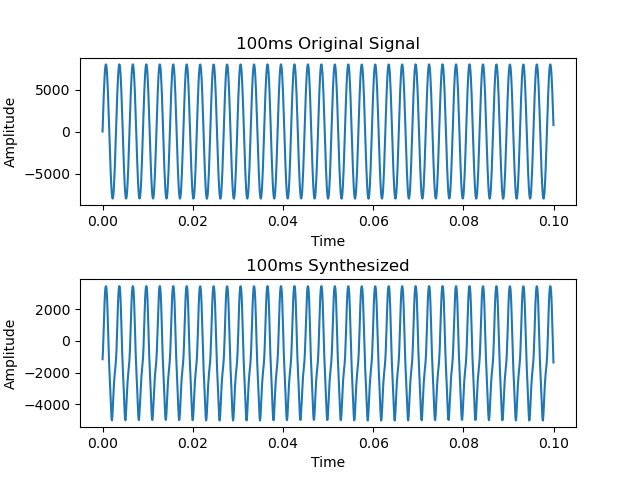

In [17]:
# Assignment 2
# Part 1
horn_fs, horn = wav.read('horn11short.wav')
time = np.arange(0, 0.1, 1 / horn_fs)
fun_freq = 335
amplitudes = np.sin(2 * np.pi * time * fun_freq) * 8000
outfile_a2_p1_1 = 'A2P1_1.wav'
wav.write(outfile_a2_p1_1, horn_fs, amplitudes.astype('int16'))

# Part 2
mag_ak = [2688, 1900, 316, 178, 78, 38]
angle_ak = [-1.73, -1.45, 2.36, 2.30, -2.30, 1.13]
# Synthesize Fourier signal given magnitude and phase rather than a list of coefficients, code functionally remains 
# the same.
def fourier_two(mag_ak, angle_ak, samp_freq, fun_freq, time):
    time_vector = np.arange(0 , time, 1 / samp_freq)
    signal = np.zeros(len(time_vector))
    for i in range(0, len(mag_ak)):
        signal += 2 * mag_ak[i] * np.cos(i * fun_freq * 2 * np.pi * time_vector + angle_ak[i]) 
    return signal, time_vector
signal1_a2_p2, time1_a2_p2 = fourier_two(mag_ak, angle_ak, horn_fs, fun_freq, 0.1)
outfile_a2_p2_1 = "A2P2_1.wav"
wav.write(outfile_a2_p2_1, horn_fs, signal1_a2_p2.astype('int16'))

# Part 3
plt.figure()
plt.subplots_adjust(hspace = 0.5)
plt.subplot(2, 1, 1)
plt.plot(time, amplitudes)
plt.title('100ms Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(time1_a2_p2, signal1_a2_p2)
plt.title('100ms Synthesized')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Part 4
# Make a Fourier signal given one magnitude and phase. Function remains the same as the previous verisons.
def fourier_two(mag_ak, angle_ak, samp_freq, fun_freq, time):
    time_vector = np.arange(0 , time, 1 / samp_freq)
    signal = 2 * mag_ak * np.cos(fun_freq * 2 * np.pi * time_vector + angle_ak) 
    return signal, time_vector
tone0, tone0t = fourier_two(mag_ak[0], angle_ak[0], horn_fs, fun_freq, 0.1)
tone1, tone1t = fourier_two(mag_ak[1], angle_ak[1], horn_fs, fun_freq, 0.1)
tone2, tone2t = fourier_two(mag_ak[2], angle_ak[2], horn_fs, fun_freq, 0.1)
tone3, tone3t = fourier_two(mag_ak[3], angle_ak[3], horn_fs, fun_freq, 0.1)
tone4, tone4t = fourier_two(mag_ak[4], angle_ak[4], horn_fs, fun_freq, 0.1)
tone5, tone5t = fourier_two(mag_ak[5], angle_ak[5], horn_fs, fun_freq, 0.1)
outfile_tone0 = 'tone0.wav'
outfile_tone1 = 'tone1.wav'
outfile_tone2 = 'tone2.wav'
outfile_tone3 = 'tone3.wav'
outfile_tone4 = 'tone4.wav'
outfile_tone5 = 'tone5.wav'
wav.write(outfile_tone0, horn_fs, tone0.astype('int16'))
wav.write(outfile_tone1, horn_fs, tone1.astype('int16'))
wav.write(outfile_tone2, horn_fs, tone2.astype('int16'))
wav.write(outfile_tone3, horn_fs, tone3.astype('int16'))
wav.write(outfile_tone4, horn_fs, tone4.astype('int16'))
wav.write(outfile_tone5, horn_fs, tone5.astype('int16'))
original_obj = sa.WaveObject.from_wave_file('horn11short.wav')
original_play = original_obj.play()
original_play.wait_done()
synth_obj = sa.WaveObject.from_wave_file('A2P1_1.wav')
synth_play = synth_obj.play()
synth_play.wait_done()
tone0_obj = sa.WaveObject.from_wave_file('tone0.wav')
tone0_play = tone0_obj.play()
tone0_play.wait_done()
tone1_obj = sa.WaveObject.from_wave_file('tone1.wav')
tone1_play = tone1_obj.play()
tone1_play.wait_done()
tone2_obj = sa.WaveObject.from_wave_file('tone2.wav')
tone2_play = tone2_obj.play()
tone2_play.wait_done()
tone3_obj = sa.WaveObject.from_wave_file('tone3.wav')
tone3_play = tone3_obj.play()
tone3_play.wait_done()
tone4_obj = sa.WaveObject.from_wave_file('tone4.wav')
tone4_play = tone4_obj.play()
tone4_play.wait_done()
tone5_obj = sa.WaveObject.from_wave_file('tone5.wav')


# Assignment 2 Discussion
Distortion comes from the magnitudes and phase values not being as refined as they could be.

<IPython.core.display.Javascript object>


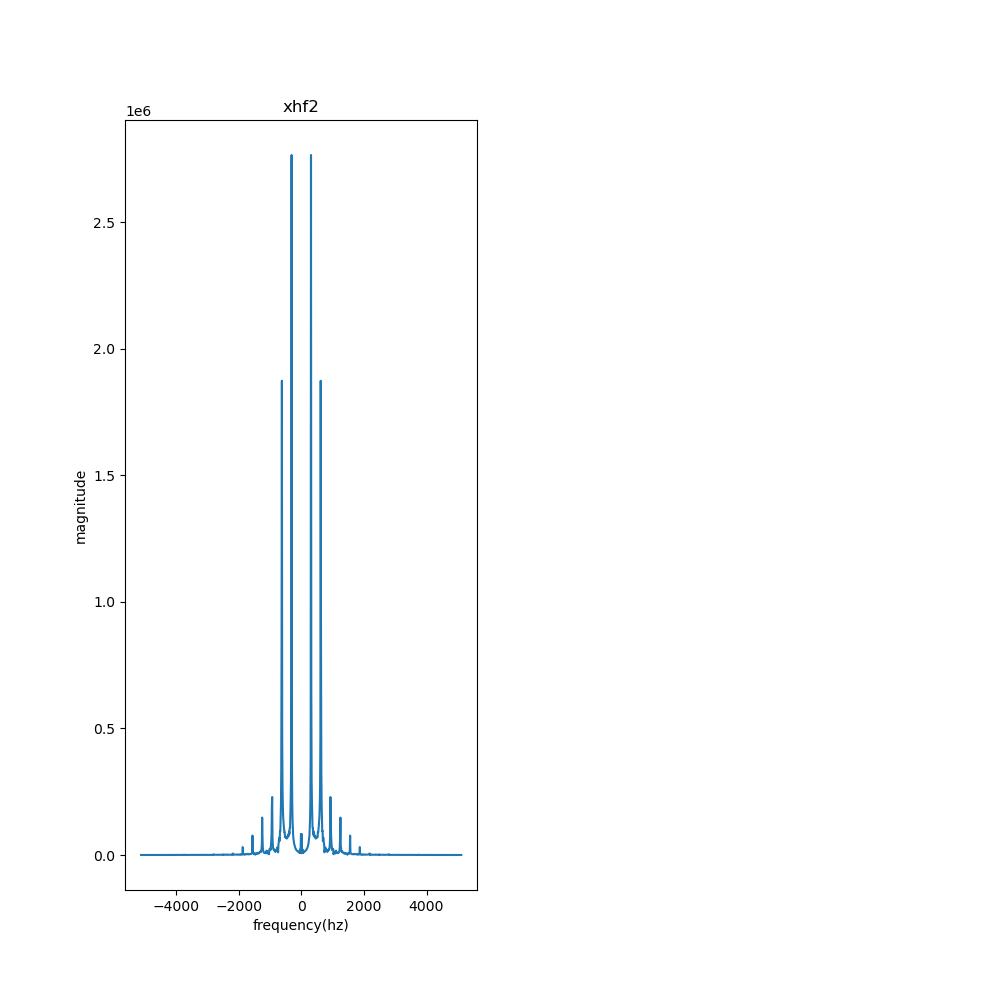

<IPython.core.display.Javascript object>


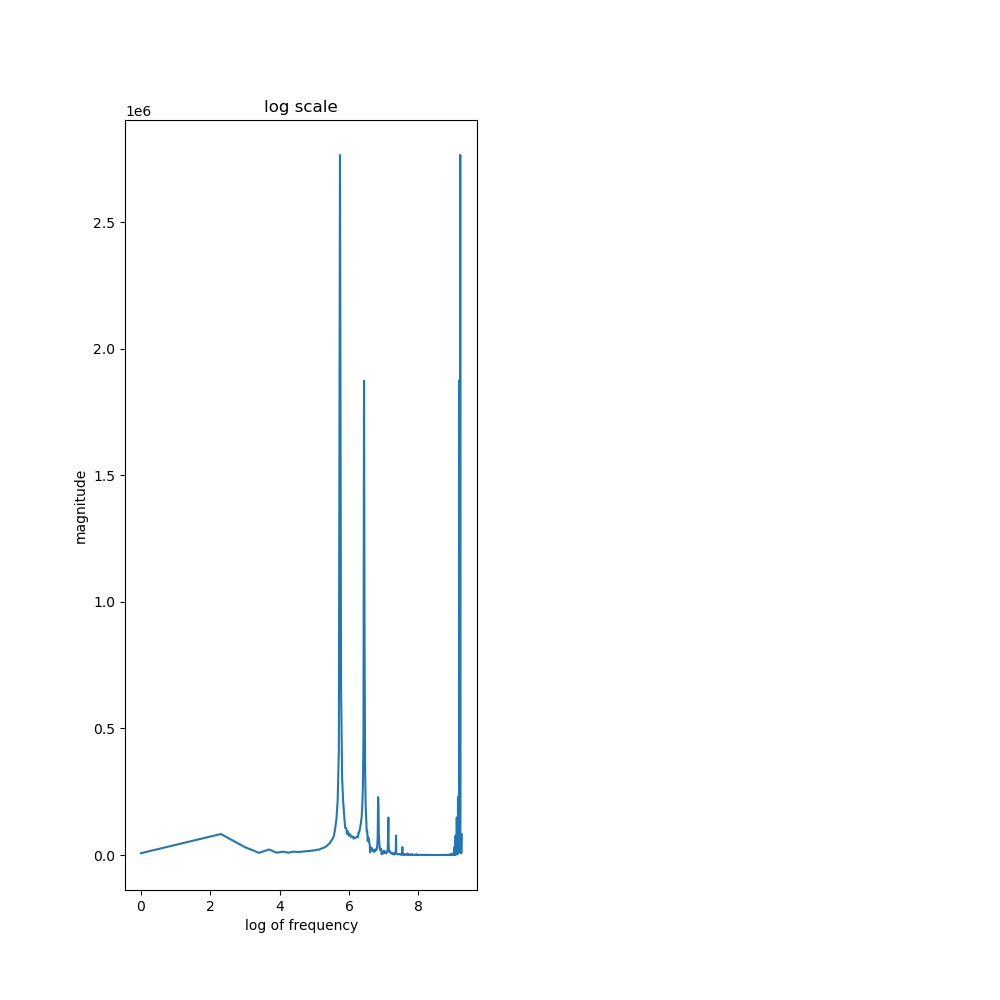

<IPython.core.display.Javascript object>


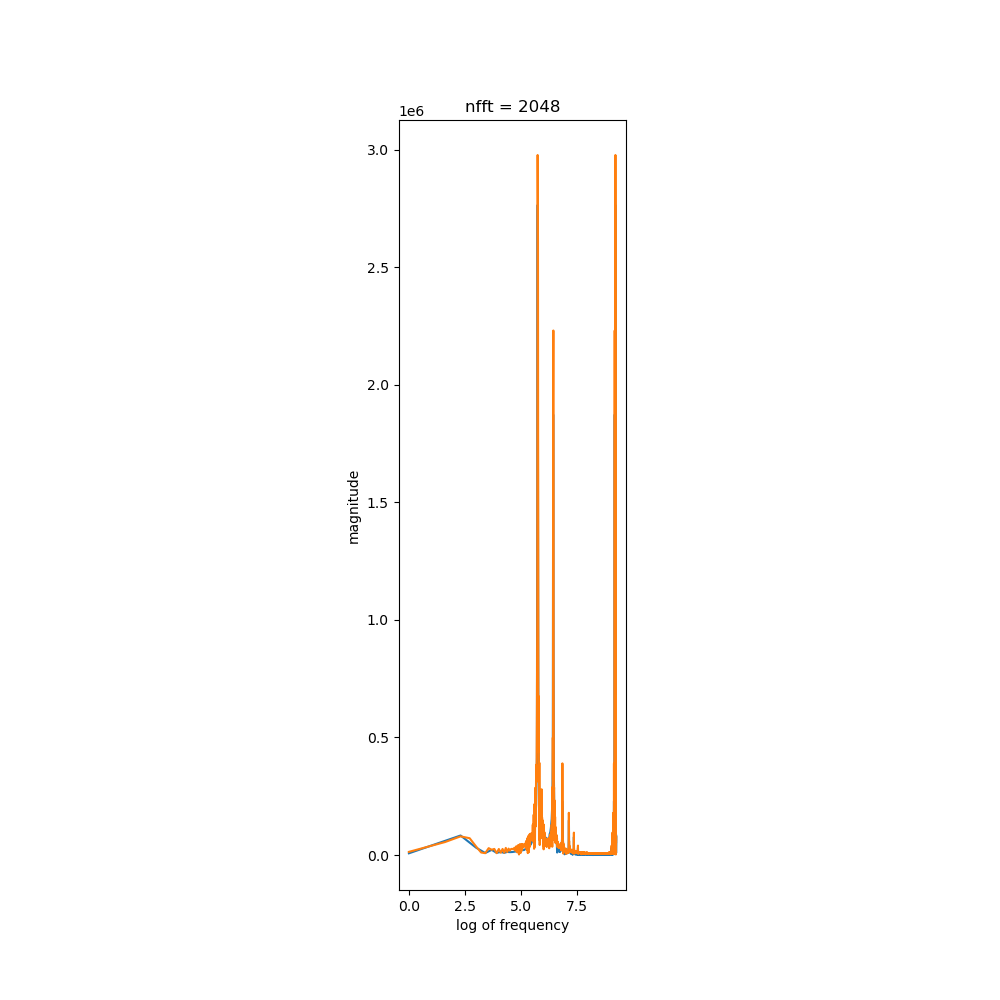

<ipython-input-12-1028a310f7b4>:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


Text(0.5, 1.0, 'nfft = 2048')

In [12]:
# Assignment 3
#computes fft - part1
fs_horn = horn_fs
nfft = 1024
horn100 = horn[int(0.2*fs_horn):int(0.3*fs_horn)+1]
xhf = np.fft.fft(horn100, nfft)
xhf2 = np.fft.fftshift(xhf)
index = np.arange(0, nfft, 1)
index2 = np.arange(-nfft/2, nfft/2, 1)
freq = index * int(fs_horn/nfft)
freq2 = index2 * int(fs_horn/nfft)
#plotting graph
fig2 = plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.plot(freq, np.abs(xhf))
plt.xlabel('frequency(hz)')
plt.ylabel('magnitude')
plt.title('xhf')
plt.subplot(1, 2, 1)
plt.plot(freq2, np.abs(xhf2))
plt.xlabel('frequency(hz)')
plt.ylabel('magnitude')
plt.title('xhf2')

#plots linear and log scale - part2
log_frequency = np.log(freq[1:])
zero = np.zeros(1)
log_frequency = np.concatenate([zero, log_frequency])
fig3 = plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.plot(freq, np.abs(xhf))
plt.xlabel('frequency(hz)')
plt.ylabel('magnitude')
plt.title('Linear Scale')
plt.subplot(1, 2, 1)
plt.plot(log_frequency, np.abs(xhf))
plt.xlabel('log of frequency')
plt.ylabel('magnitude')
plt.title('log scale')

#plots the fft - part3
xhf3 = np.fft.fft(horn100, 2048)
index3 = np.arange(0, 2048, 1)
freq3 = index3 * int(fs_horn/2048)
log_freq3 = np.log(freq3[1:])
log_freq3 = np.concatenate([zero, log_freq3])
fig3 = plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 2)
plt.plot(log_frequency, np.abs(xhf))
plt.xlabel('log of frequency')
plt.ylabel('magnitude')
plt.title('nfft = 1024')
plt.subplot(1, 3, 2)
plt.plot(log_freq3, np.abs(xhf3))
plt.xlabel('log of frequency')
plt.ylabel('magnitude')
plt.title('nfft = 2048')

# Assignment 3 Discussion
Since a digital program can't synthesize a continuous time sinusodal wave, it is very easy to distinguish it from the synthesized program which has the ability to do so.

<IPython.core.display.Javascript object>


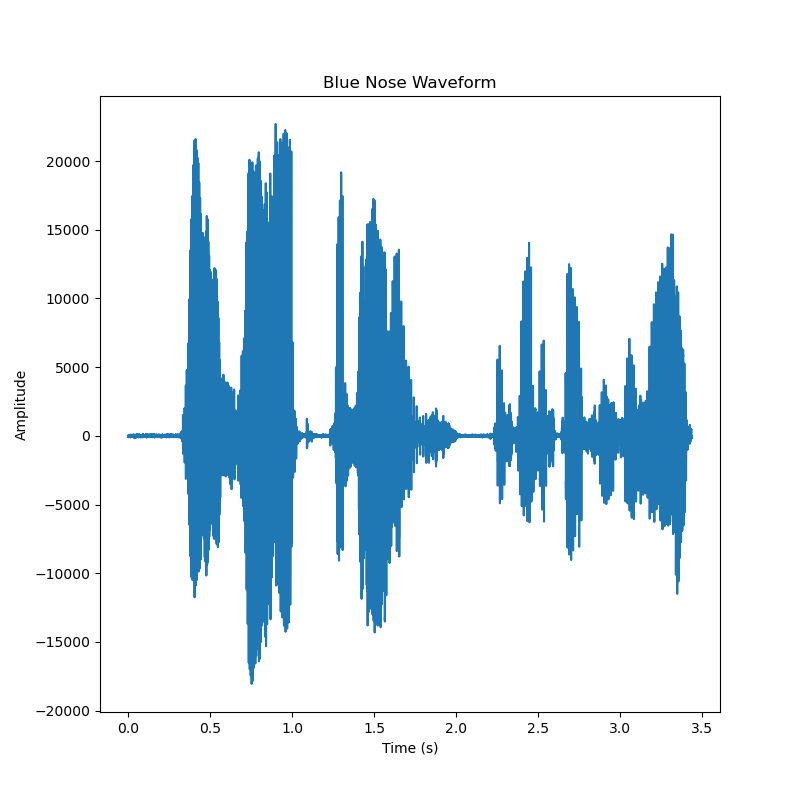

<IPython.core.display.Javascript object>


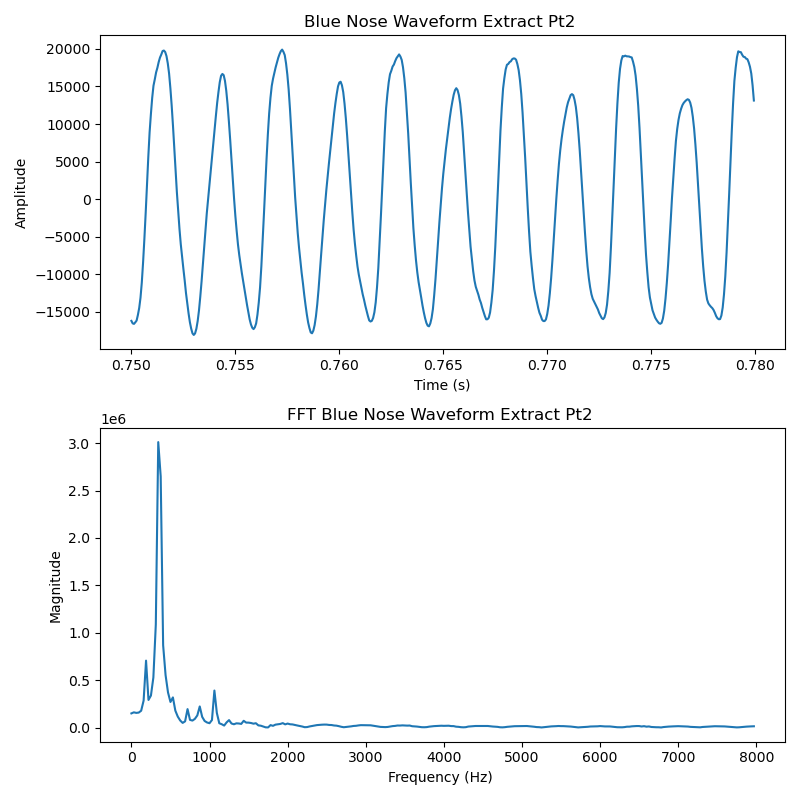

480


<IPython.core.display.Javascript object>


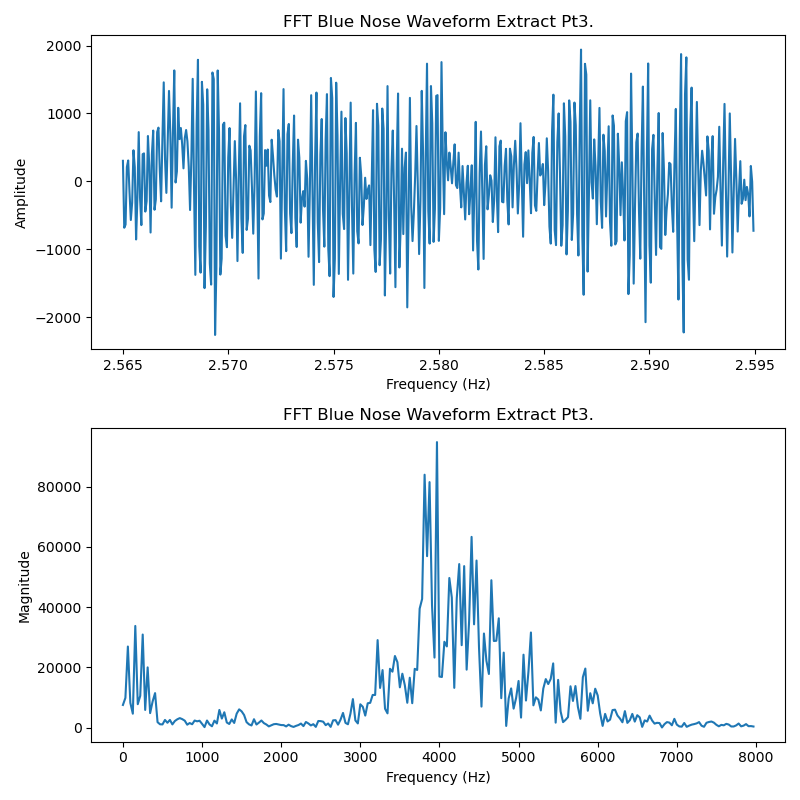

In [7]:
# Assignment 4
# Part 1
fs2, bluenose = wav.read('bluenose3.wav') 
#creates time vector 
time_vect = np.arange(0, len(bluenose)/fs2 , 1/fs2) 

#wave form plot
fig = plt.figure(6, figsize = (8, 8))
plt.title('Blue Nose Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(time_vect, bluenose)

#plays wav file 
bluenose_obj = sa.WaveObject.from_wave_file('bluenose3.wav')
bluenose_play = bluenose_obj.play()
bluenose_play.wait_done()

# Part 2
# extracts data from range [.75 to .78]
extracted_data = bluenose[int(0.75*fs2): int(0.78*fs2)]
NFFT2 = 512
# FFT of 'oo' data
xhf4 = np.fft.fft(extracted_data, NFFT2)
freq_resol3 = fs2/NFFT2
freq4 = np.arange(0, fs2, freq_resol3) 

#shape of extracted data
fig = plt.figure(7, figsize = (8,8))
#time domain plot with differnt graph features
plt.subplot(211) 
plt.plot(time_vect[int(0.75*fs2):int(0.78*fs2)], extracted_data)
plt.title('Blue Nose Waveform Extract Pt2 ')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
#Frequency domain plot with differnt features
plt.subplot(212) 
plt.plot(freq4[:(NFFT2 // 2)], np.abs(xhf4[:(NFFT2 // 2)]))
plt.title('FFT Blue Nose Waveform Extract Pt2 ')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz) ')

plt.tight_layout()

# Part 3
# data extraction from 2.565 to 2.595
Ssound_data = bluenose[int(2.565*fs2): int(2.595*fs2)] 
print(len(Ssound_data))
xhf5 = np.fft.fft(Ssound_data, NFFT2)
freq_resol3 = fs2/NFFT2
freq4 = np.arange(0, fs2, freq_resol3)

#figure for data extracted 
fig = plt.figure(8, figsize = (8,8))

#time domain plot with graph features
plt.subplot(211) 
plt.plot(time_vect[int(2.565*fs2):int(2.595*fs2)], Ssound_data)
plt.title('FFT Blue Nose Waveform Extract Pt3.')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

#frequency domain plot with graph features
plt.subplot(212)
plt.plot(freq4[:(NFFT2 // 2)], np.abs(xhf5[:(NFFT2 // 2)]))
plt.title('FFT Blue Nose Waveform Extract Pt3.')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')

plt.tight_layout()

# Assignment 4 Discussion
We know that doing 2 to the power of "something"  would give us the length of the segment. So we solved for "something" and used 9 for nfft because thats what would make our argument true.
Both plots, the time domain plot and frequency plots, were very distinct  from each other. I expected them to look at least a little similar but I was surprised to see the spikes in unexpected  places. The pronunciation of both are also quite different which contributed to their differences. For example, "oo" is a very fast sound while s has a longer pronunciation.